<a href="https://colab.research.google.com/github/IssabellaZ/MA3K7/blob/main/assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def spiral_matrix(n):
  # initialize square matrix
  mat = [[0] * n for _ in range(n)]
  num = 1

  # adjust initial position of 1
  if n % 2 == 0:
    row, col = n // 2, n // 2 - 1  # starting from bottom-left corner of the inner four squares for even n
  else:
    row, col = n // 2, n // 2

  # fill in number 1
  mat[row][col] = num
  num += 1

  # determine how many steps taken in each direction
  steps = 1
  while num <= n*n:
    # Move right
    for _ in range(steps):
      if num <= n*n:
        col += 1
        mat[row][col]=num
        num += 1
    # Move up
    for _ in range(steps):
      if num <= n*n:
        row -= 1
        mat[row][col]=num
        num += 1
    steps += 1
    # Move left
    for _ in range(steps):
      if num <= n*n:
        col -= 1
        mat[row][col]=num
        num += 1
    # Move down
    for _ in range(steps):
      if num <= n*n:
        row += 1
        mat[row][col]=num
        num += 1
    steps += 1
  return mat


def sum_diagonal(mat):
  sum = 0
  for i in range(len(mat)):
    sum += mat[i][i]
  return sum


def print_spiral_matrix_with_colors(mat):
  for i in range(len(mat)):
    for j in range(len(mat[i])):
      if i == j:
        print(f'\x1b[31m{mat[i][j]}\x1b[0m', end=' ')  # print main diagonal in red, end=' ' is used to ensure each entry is printed on the same line
      else:
        print(mat[i][j], end=' ')
    print()  # move to the next line after printing each row


# Example
for n in range(2, 11):
  mat = spiral_matrix(n)
  print(f'Spiral matrix for n = {n}:')
  print_spiral_matrix_with_colors(mat)
  print(f'The sum of main diagonal for n = {n} is:', sum_diagonal(mat))
  print()

# # verify S(n) for even n
# def S_even(n):
#     return (n * (n + 1) * (2 * n + 1)) // 6 + n // 2
# for n in range(2,11,2):
#   print(S_even(n))

# # verify S(n) for odd n
# def S_odd(n):
#     return (n * (n + 1) * (2 * n + 1)) // 6 + (n-1) // 2
# for n in range(1,11,2):
#   print(S_odd(n))

Spiral matrix for n = 2:
4 3 
1 2 
The sum of main diagonal for n = 2 is: 6

Spiral matrix for n = 3:
5 4 3 
6 1 2 
7 8 9 
The sum of main diagonal for n = 3 is: 15

Spiral matrix for n = 4:
16 15 14 13 
5 4 3 12 
6 1 2 11 
7 8 9 10 
The sum of main diagonal for n = 4 is: 32

Spiral matrix for n = 5:
17 16 15 14 13 
18 5 4 3 12 
19 6 1 2 11 
20 7 8 9 10 
21 22 23 24 25 
The sum of main diagonal for n = 5 is: 57

Spiral matrix for n = 6:
36 35 34 33 32 31 
17 16 15 14 13 30 
18 5 4 3 12 29 
19 6 1 2 11 28 
20 7 8 9 10 27 
21 22 23 24 25 26 
The sum of main diagonal for n = 6 is: 94

Spiral matrix for n = 7:
37 36 35 34 33 32 31 
38 17 16 15 14 13 30 
39 18 5 4 3 12 29 
40 19 6 1 2 11 28 
41 20 7 8 9 10 27 
42 21 22 23 24 25 26 
43 44 45 46 47 48 49 
The sum of main diagonal for n = 7 is: 143

Spiral matrix for n = 8:
64 63 62 61 60 59 58 57 
37 36 35 34 33 32 31 56 
38 17 16 15 14 13 30 55 
39 18 5 4 3 12 29 54 
40 19 6 1 2 11 28 53 
41 20 7 8 9 10 27 52 
42 21 22 23 24 25 26 51 
43 44 

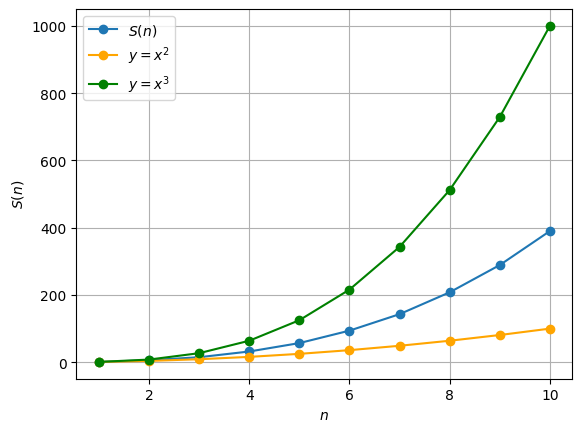

In [2]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
S = np.array([1, 6, 15, 32, 57, 94, 143, 208, 289, 390])

# compute x^2 and x^3 for comparison
y1 = x**2
y2 = x**3

# plot
plt.plot(x, S, marker='o', linestyle='-', label='$S(n)$',ms=6)
plt.plot(x, y1, marker='o', linestyle='-', color='orange', label='$y=x^2$',ms=6)
plt.plot(x, y2, marker='o', linestyle='-', color='green', label='$y=x^3$',ms=6)

plt.xlabel('$n$')
plt.ylabel('$S(n)$')
plt.legend()

plt.grid(True)
plt.show()


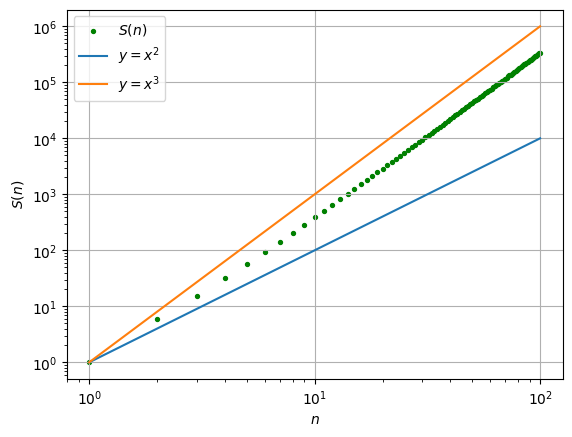

In [3]:
# compute S(n) for n from 1 to 100
n = range(1, 101)
S_n = []
for i in n:
  mat = spiral_matrix(i)
  S_n.append(sum_diagonal(mat))

# compute x^2 and x^3 for comparison
x = np.logspace(0, 2, 100)
y1 = x**2
y2 = x**3

# LOG-LOG plot
plt.scatter(n, S_n, label='$S(n)$',s=8,color='green')
plt.loglog(x, y1, label='$y=x^2$')
plt.loglog(x, y2,label='$y=x^3$')

plt.xlabel('$n$')
plt.ylabel('$S(n)$')
plt.legend()

plt.grid(True)
plt.show()


In [4]:
# list of varying sample sizes
l = [range(1, 11), range(1, 51), range(1, 101),range(1,1001)]

powers = []
for sample in l:
  S_n = []
  for n in sample_size:
    mat = spiral_matrix(n)
    S_n.append(sum_diagonal(mat))

  # log transform
  log_x = np.log(sample)
  log_y = np.log(S_n)

  coefficients = np.polyfit(log_x, log_y, 1)
  power = coefficients[0]

  powers.append(power)

for i, sample in enumerate(l):
  print(f"Power of S(n) with respect to n, given sample size {len(sample)}:", powers[i])


Power of S(n) with respect to n, given sample size 10: 2.581585568517524
Power of S(n) with respect to n, given sample size 50: 2.801359971735155
Power of S(n) with respect to n, given sample size 100: 2.8659763477858635
Power of S(n) with respect to n, given sample size 1000: 2.9698333508692296
